## *Import/get the dataset* ##

In [1]:
# Dataset's source:

!wget "https://raw.githubusercontent.com/louiskrisdy/ML-Dataset/main/500_Person_Gender_Height_Weight_Index.csv"

--2023-06-24 08:53:41--  https://raw.githubusercontent.com/louiskrisdy/ML-Dataset/main/500_Person_Gender_Height_Weight_Index.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8318 (8.1K) [text/plain]
Saving to: ‘500_Person_Gender_Height_Weight_Index.csv’

500_Person_Gender_H 100%[===================>]   8.12K  --.-KB/s    in 0s      

2023-06-24 08:53:42 (78.7 MB/s) - ‘500_Person_Gender_Height_Weight_Index.csv’ saved [8318/8318]



## *Import library/packages* ##

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## *Read the data* ##

In [3]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
print(data.describe())
print(data.info())
print(data.head())

           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None
   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


In [4]:
# checking null value
for i in data:
  print(i, data[i].dtypes, data[i].isna().sum())

Gender object 0
Height int64 0
Weight int64 0
Index int64 0


## *Create function for category, using indexes* ##

In [5]:
def categorizing(ind):
    if ind==0:
        return 'Extremely Weak'
    elif ind==1:
        return 'Weak'
    elif ind==2:
        return 'Normal'
    elif ind==3:
        return 'OverWeight'
    elif ind==4:
        return 'Obesity'
    elif ind==5:
        return 'Extremely Obese'

## *Process the data* ##

In [6]:
# Categorizing Index
data['Index'] = data['Index'].apply(categorizing)

data.head()

,Gender,Height,Weight,Index
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,OverWeight
4,Male,149,61,OverWeight


<function matplotlib.pyplot.show(close=None, block=None)>

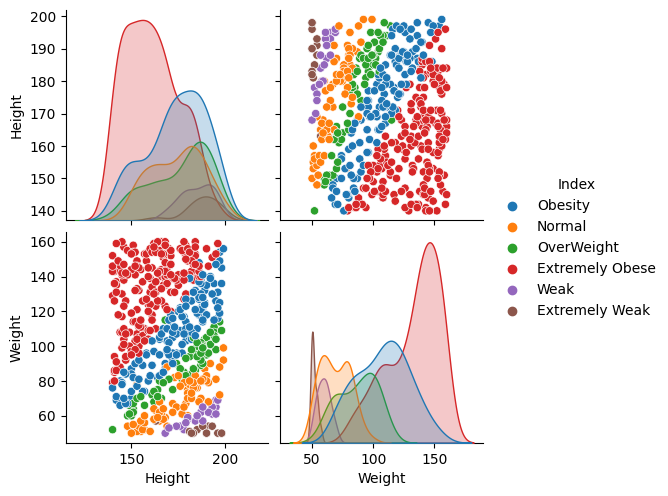

In [7]:
# plot
sb.pairplot(data, hue="Index")
plt.rcParams["figure.figsize"] = [16 , 9]
plt.show

In [8]:
people = data['Gender'].value_counts()

categories = data['Index'].value_counts()

# Stats for Male
data[data['Gender']=='Male']['Index'].value_counts()

# Stats for Female
data[data['Gender']=='Female']['Index'].value_counts()

# Replacing object type data
data2 = pd.get_dummies(data['Gender'])
data.drop('Gender',axis=1,inplace=True)
data = pd.concat([data,data2],axis=1)

y=data['Index']
data =data.drop(['Index'],axis=1)

scaler = StandardScaler()
data = scaler.fit_transform(data)
data=pd.DataFrame(data)

# train test data split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=101)

param_grid = {'n_estimators':[100,200,300,400,500,600,700,800,1000]}
grid_cv = GridSearchCV(RandomForestClassifier(random_state=101),param_grid,verbose=3)

grid_cv.fit(X_train,y_train)

print(grid_cv.best_params_)
# weight category prediction
pred = grid_cv.predict(X_test)


print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('Accuracy is --> ',accuracy_score(y_test,pred)*100)
print('\n')

# Function for predicting new input data
def lp(details):
    gender = details[0]
    height = details[1]
    weight = details[2]

    if gender=='Male':
        details=np.array([[np.float(height),np.float(weight),0.0,1.0]])
    elif gender=='Female':
        details=np.array([[np.float(height),np.float(weight),1.0,0.0]])

    y_pred = grid_cv.predict(scaler.transform(details))
    return (y_pred[0])



#Live predictor
your_details = ['Male',175,80]
print(lp(your_details))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................n_estimators=100;, score=0.857 total time=   0.2s
[CV 2/5] END ..................n_estimators=100;, score=0.886 total time=   0.2s
[CV 3/5] END ..................n_estimators=100;, score=0.829 total time=   0.3s
[CV 4/5] END ..................n_estimators=100;, score=0.786 total time=   0.3s
[CV 5/5] END ..................n_estimators=100;, score=0.900 total time=   0.3s
[CV 1/5] END ..................n_estimators=200;, score=0.843 total time=   0.5s
[CV 2/5] END ..................n_estimators=200;, score=0.900 total time=   0.5s
[CV 3/5] END ..................n_estimators=200;, score=0.843 total time=   0.5s
[CV 4/5] END ..................n_estimators=200;, score=0.829 total time=   0.4s
[CV 5/5] END ..................n_estimators=200;, score=0.886 total time=   0.3s
[CV 1/5] END ..................n_estimators=300;, score=0.843 total time=   0.5s
[CV 2/5] END ..................n_estimators=300;,

<ipython-input-8-f90d1e09d8a4>:50: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  details=np.array([[np.float(height),np.float(weight),0.0,1.0]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
